## Data Science - Song Popularity Prediction & Song Recommendation (Group I)

## Importing Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
from scipy import stats
from scipy.stats import chi2_contingency 
import time

## Statistical Analysis

### Reading Dataset

In [2]:
df = pd.read_csv('cleaned_spotify.csv')

### Correlation Coefficients and Plots

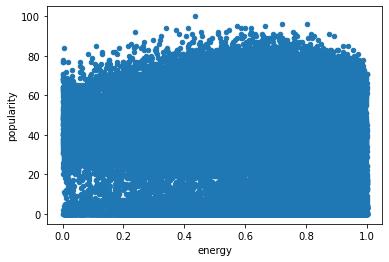

energy (-0.052816160986636274, 1.4465615512876798e-41)
energy SpearmanrResult(correlation=-0.0548598973179084, pvalue=1.0342639695620801e-44)


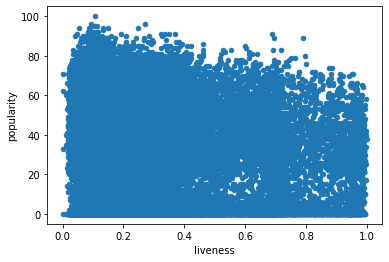

liveness (-0.12366393954423946, 7.694790797147955e-221)
liveness SpearmanrResult(correlation=-0.06976587217212596, pvalue=2.927574355456814e-71)


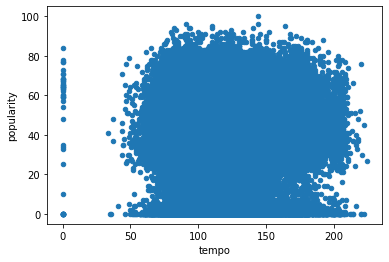

tempo (-0.03850282709404325, 7.391022519816153e-23)
tempo SpearmanrResult(correlation=-0.05098315599930578, pvalue=7.5964734095764e-39)


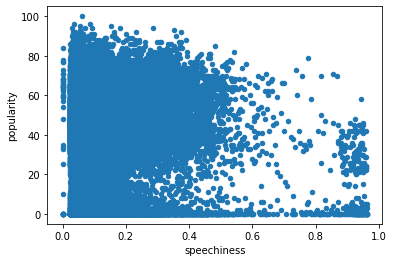

speechiness (0.0026670287793427554, 0.49554435610853614)
speechiness SpearmanrResult(correlation=-0.012357217205168379, pvalue=0.0015896094051852628)


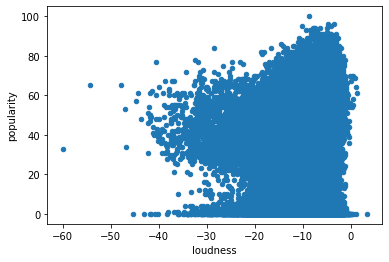

loudness (0.1277654962053031, 1.034594069091421e-235)
loudness SpearmanrResult(correlation=0.20644959518002037, pvalue=0.0)


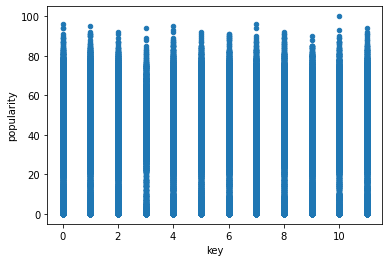

key (-0.016498754210884172, 2.483702304160075e-05)
key SpearmanrResult(correlation=-0.01591916536475294, pvalue=4.738952861862048e-05)


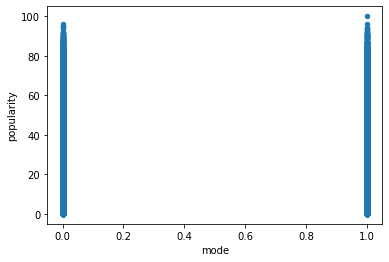

mode (0.02640251644986268, 1.4998952441874942e-11)
mode SpearmanrResult(correlation=0.01646837343433714, pvalue=2.5705939059280635e-05)


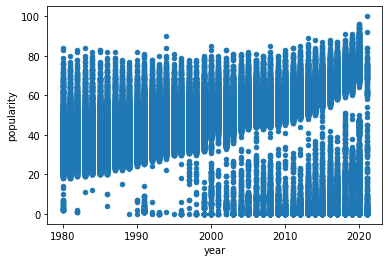

year (-0.14513002489907767, 3.0763626862171985e-304)
year SpearmanrResult(correlation=-0.024916112438289333, pvalue=1.9163844129802066e-10)


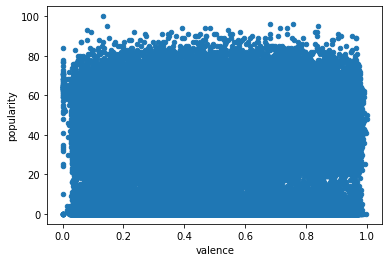

valence (0.08334614393009797, 5.388301053962575e-101)
valence SpearmanrResult(correlation=0.06529640084454334, pvalue=1.2409373203314835e-62)


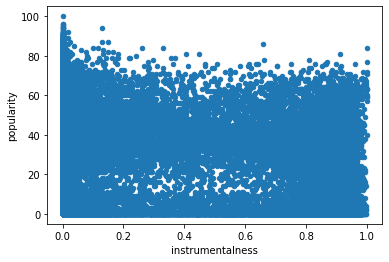

instrumentalness (-0.3560120546706304, 0.0)
instrumentalness SpearmanrResult(correlation=-0.359851724546611, pvalue=0.0)


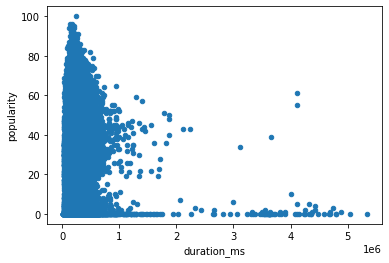

duration_ms (-0.09539414294337098, 7.789419098502553e-132)
duration_ms SpearmanrResult(correlation=-0.05285543064166288, pvalue=1.261866142991952e-41)


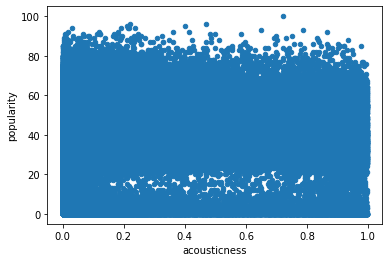

acousticness (0.024564752122289705, 3.428002377991466e-10)
acousticness SpearmanrResult(correlation=0.09128369843857481, pvalue=7.6985477243322275e-121)


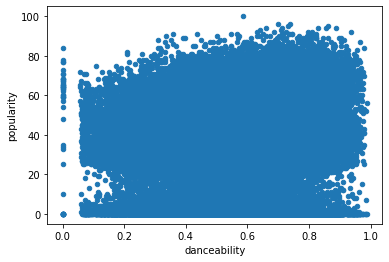

danceability (0.09395327983126325, 6.331774090855101e-128)
danceability SpearmanrResult(correlation=0.1043297053780961, pvalue=1.960383898894853e-157)


In [3]:
## Filter out all years less than 1980
df.drop(df.index[df['year'] < 1980], inplace=True)

## Plot all data against popularity and calculate pearson and spearman coefficients
l = ["energy", "liveness", "tempo", "speechiness","loudness","key","mode","year","valence","instrumentalness","duration_ms","acousticness", "danceability"]
for i in range(len(l)):
        df.plot.scatter(x=l[i], y='popularity')
        plt.show()
        print(l[i], stats.pearsonr(df[l[i]], df['popularity']))
        print(l[i], stats.spearmanr(df[l[i]], df['popularity']))

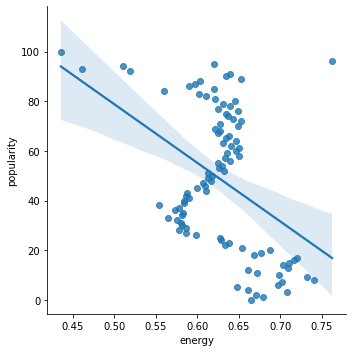

energy (-0.4344155201897221, 7.847003795680783e-06)
energy SpearmanrResult(correlation=-0.36765934114976817, pvalue=0.00019588246380522736)


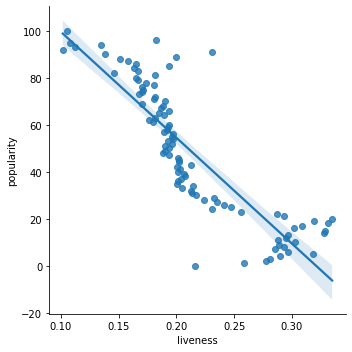

liveness (-0.8671383535547533, 8.124359351639556e-31)
liveness SpearmanrResult(correlation=-0.9118132726380148, pvalue=6.880356471859349e-39)


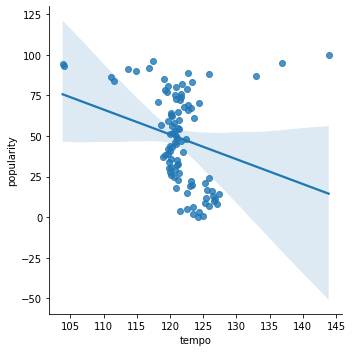

tempo (-0.26011909438286057, 0.009690040747031397)
tempo SpearmanrResult(correlation=-0.4051348749434169, pvalue=3.5026058198877364e-05)


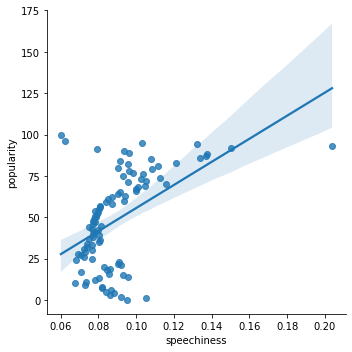

speechiness (0.4976732344054016, 1.851504485120718e-07)
speechiness SpearmanrResult(correlation=0.4809657696255634, pvalue=5.363655816076445e-07)


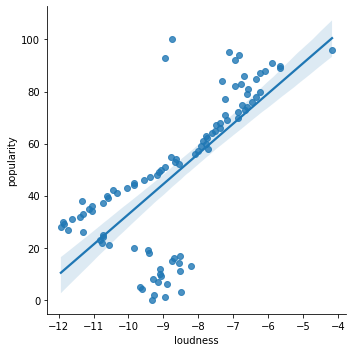

loudness (0.7097163075808939, 2.81945907219825e-16)
loudness SpearmanrResult(correlation=0.7279166586972182, pvalue=2.0442351310180274e-17)


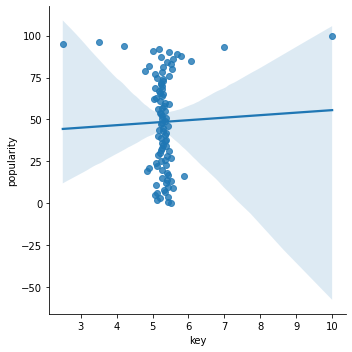

key (0.03404431046781409, 0.7392899463804475)
key SpearmanrResult(correlation=-0.06658017131214554, pvalue=0.5148033855718794)


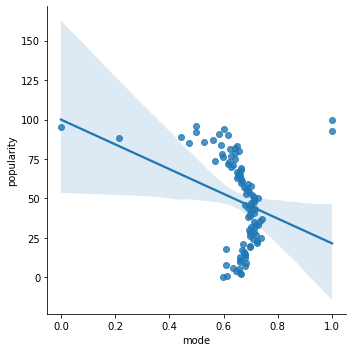

mode (-0.3029906711674514, 0.0024246210731238707)
mode SpearmanrResult(correlation=-0.39857059064362027, pvalue=4.807532749777778e-05)


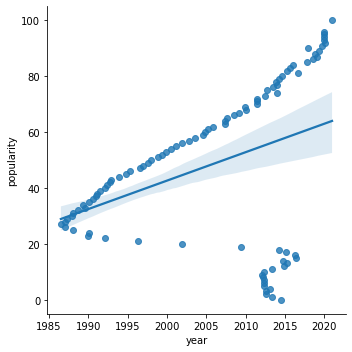

year (0.38732886558656215, 8.144161093204613e-05)
year SpearmanrResult(correlation=0.42574150132571426, pvalue=1.2402137177725726e-05)


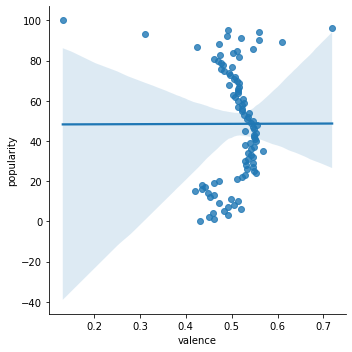

valence (0.001558652010591327, 0.9878471718109004)
valence SpearmanrResult(correlation=0.07712513308978698, pvalue=0.450351580985499)


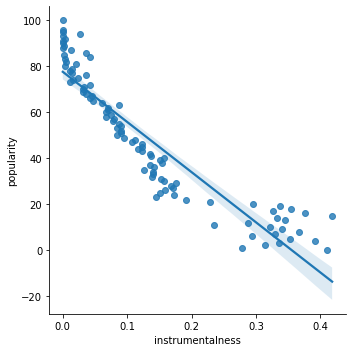

instrumentalness (-0.92611642062891, 1.9830686697222207e-42)
instrumentalness SpearmanrResult(correlation=-0.976907726539538, pvalue=3.7441786493238983e-66)


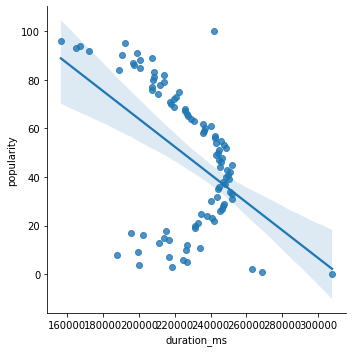

duration_ms (-0.4825580234528486, 4.85832886375726e-07)
duration_ms SpearmanrResult(correlation=-0.4289667132082448, pvalue=1.0476535232999168e-05)


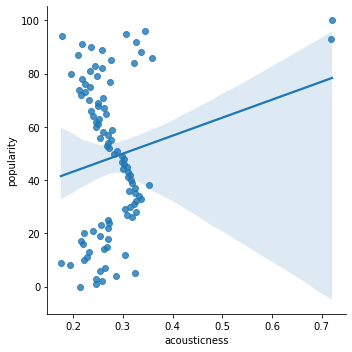

acousticness (0.18027356944283368, 0.07568297605421227)
acousticness SpearmanrResult(correlation=0.0005164202513245222, pvalue=0.9959733287545589)


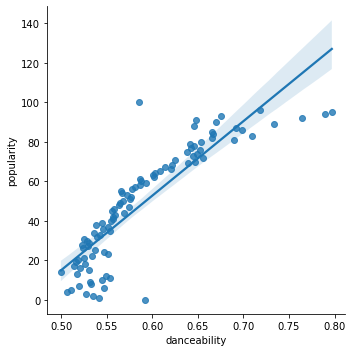

danceability (0.8735271056013276, 8.924594502946825e-32)
danceability SpearmanrResult(correlation=0.9144017494532957, pvalue=1.7521639128707332e-39)


In [4]:
## Determine coefficients based on average attribute over popularity
df1 = df.groupby('popularity')
df1 = df1.mean()
df1 = df1.reset_index()
l = ["energy", "liveness", "tempo", "speechiness","loudness","key","mode","year","valence","instrumentalness","duration_ms","acousticness", "danceability"]
for i in range(len(l)):
        # df1.plot.scatter(x=l[i], y='popularity')
        sns.lmplot(x=l[i],y="popularity", data=df1, palette="Paired")
        # sns.lmplot(x=l[i],y="popularity", data=df1, palette="Paired", order=2)
        plt.show()
        print(l[i], stats.pearsonr(df1[l[i]], df1['popularity']))
        print(l[i], stats.spearmanr(df1[l[i]], df1['popularity']))

## Machine Learning

### Importing New Packages

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

In [6]:
# df2 = pd.read_csv('cleaned_spotify.csv')
df3 = pd.read_csv('cleaned_spotify.csv')

In [7]:
## Popularity assessment begins with filtering for songs more recent than 1980 to avoid 0s
# df2.drop(df2.index[df2['year'] < 1980], inplace=True)
# df2.drop(df2.index[df2['popularity'] == 0], inplace=True)

df3.drop(df3.index[df3['year'] < 1980], inplace=True)

#### Establish training and testing sets

In [8]:
print("number of samples: " + str(len(df3)))

# X2 = df2[['loudness', 'energy', 'instrumentalness', 'acousticness', 'liveness', 'duration_ms', 'speechiness']]
# X12 = df2[['loudness', 'energy', 'instrumentalness', 'acousticness', 'liveness', 'duration_ms', 'speechiness', 'valence', 'danceability', 'tempo']]
# y2 = df2['popularity']
# X2_train, X2_test, y2_train, y2_test = train_test_split(X12,y2,test_size=0.2,random_state=0)

# X = df3[['loudness', 'energy', 'instrumentalness', 'acousticness', 'liveness', 'duration_ms', 'speechiness']]
X1 = df3[['loudness', 'energy', 'instrumentalness', 'acousticness', 'liveness', 'duration_ms', 'speechiness', 'valence', 'danceability', 'tempo']]
y = df3['popularity']
mean = y.mean()
print("the mean is: " + str(mean))

X_train, X_test, y_train, y_test = train_test_split(X1,y,test_size=0.2,random_state=0)

## Classify data
y_bool_train = [i > mean for i in y_train]
for i in range(len(y_bool_train)):
    if y_bool_train[i]:
        y_bool_train[i] = 1
    else:
        y_bool_train[i] = 0

y_bool_test = [i > mean for i in y_test]
for i in range(len(y_bool_test)):
    if y_bool_test[i]:
        y_bool_test[i] = 1
    else:
        y_bool_test[i] = 0

print("number of popular samples: " + str(sum(y_bool_test) + sum(y_bool_train)))

number of samples: 65300
the mean is: 37.70030627871363
number of popular samples: 36686


#### Classification Models

In [9]:
#model1 = LogisticRegression(random_state = 0, solver = 'liblinear', class_weight = {'loudness' : 0.22, 'energy' : 0.2, 'instrumentalness' : 0.22, 'acousticness': 0.18, 'liveness': 0.2})
#model1 = LogisticRegression()
#params = {'C': [0.1, 1, 10]}
#grid = GridSearchCV(estimator = model1, param_grid = params)
#result = grid.fit(X_train, y_train)
#print("Best: %f using %s" % (result.best_score_, result.best_params_))

#classification

print('Logistic Regression')
model1 = LogisticRegression(solver='liblinear')
lrscores = cross_val_score(model1, X_train, y_bool_train, scoring='f1', cv=5)
print(lrscores)
print('avg cv score: ' + str(sum(lrscores)/len(lrscores)))
model1.fit(X_train, y_bool_train)
pred = model1.predict(X_test)
print('score on test data: ' + str(f1_score(y_bool_test, pred)))

print()

print('Decision Tree Classifier')
model2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=12)
dtscores = cross_val_score(model2, X_train, y_bool_train, scoring='f1', cv=5)
print(dtscores)
print('avg cv score: ' + str(sum(dtscores)/len(dtscores)))
model2.fit(X_train, y_bool_train)
pred = model2.predict(X_test)
print('score on test data: ' + str(f1_score(y_bool_test, pred)))

Logistic Regression
[0.71385954 0.71379718 0.71458879 0.71556774 0.71791394]
avg cv score: 0.7151454394415728
score on test data: 0.7243938644235527

Decision Tree Classifier
[0.71984745 0.72960516 0.73361227 0.72125763 0.72926545]
avg cv score: 0.7267175918823754
score on test data: 0.7245254269570185


### Regression

#### Regression Models

In [97]:
import pandas as pd
from statistics import mean
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn import neighbors
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

In [80]:
df = pd.read_csv('cleaned_spotify.csv')

X = df[['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence', 'year']]
max_year = max(X['year'])

X['year'] = abs(max_year - df['year'])

# X.loc[:, 'age'] = abs(max_year - X['year'])
# X.drop(columns='year')


# X_age = abs(max_year - X['year'])
# X.drop(columns='year')
# X['age'] = X_age


# X['year'] = X_age
# X.loc[['year']] = abs(max_year) - X.loc[['year']]
# X.loc[:, ['year']].apply(lambda x: abs(max_year - x))
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

C:\Users\elite\AppData\Local\Temp/ipykernel_15284/2985162978.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['year'] = abs(max_year - df['year'])


In [35]:
print('Linear Regression')
linear_regression_model = LinearRegression()
lr_scores = cross_val_score(linear_regression_model, X_train, y_train, cv=5, scoring='r2')
print(lr_scores)
print('avg cv score: ', mean(lr_scores))
# model5.fit(X_train, y_train)
# pred = model5.predict(X_test)
# print('score on test data: ' + str(r2_score(y_test, pred)))

# Linear Regression
# [0.40482407 0.41161445 0.40603056 0.40546286 0.41217253]
# avg cv score:  0.4080208958301596

# print()
# print('Support Vector Regression')
# svm = svm.SVR()
# sv_scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='r2')
# print(sv_scores)
# print('avg cv score: ', mean(sv_scores))

# # Support Vector Regression
# # [0.0767706  0.07914685 0.07777545 0.07724948 0.07266257]
# # avg cv score:  0.07672099037137044

# print()
# print('Nearest Neighbors Regression')
# knr = neighbors.KNeighborsRegressor()
# knr_scores = cross_val_score(knr, X_train, y_train, cv=5, scoring='r2')
# print(knr_scores)
# print('avg cv score: ', mean(knr_scores))

# # Nearest Neighbors Regression
# # [0.27771797 0.27675422 0.28411321 0.27036806 0.27996391]
# # avg cv score:  0.277783474854868

# print()
# print('Decision Tree Regression')
# clf = tree.DecisionTreeRegressor()
# clf_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='r2')
# print(clf_scores)
# print('avg cv score: ', mean(clf_scores))
# # Decision Tree Regression
# # [0.3542     0.35530328 0.32938688 0.35318616 0.33816968]
# # avg cv score:  0.34604920139355017

print()
print('Random Forest Regressor')
rfr = RandomForestRegressor()
rfr_scores = cross_val_score(rfr, X_train, y_train, cv=5, scoring='r2')
print(rfr_scores)
print('avg cv score: ', mean(rfr_scores))
# Random Forest Regressor
# [0.68140303 0.67684171 0.67704753 0.67795496 0.67941476]
# avg cv score:  0.6785323969124057

print()
print('Gradient Boosting Regression')
gradient_boosting_reg = GradientBoostingRegressor()
# gradient_boosting_reg = GradientBoostingRegressor(learning_rate=0.05, max_depth=9)
gb_scores = cross_val_score(gradient_boosting_reg, X_train, y_train, cv=5, scoring='r2')
print(gb_scores)
print('avg cv score: ', mean(gb_scores))
# model4.fit(X_train, y_train)
# pred = model4.predict(X_test)
# print('score on test data: ' + str(r2_score(y_test, pred)))

# Gradient Boosting Regression
# [0.64190915 0.63607062 0.63602055 0.63823954 0.6386349 ]
# avg cv score:  0.6381749532263363


Linear Regression
[0.40394108 0.40284843 0.40718473 0.40402288 0.41214755]
avg cv score:  0.4060289331862682

Random Forest Regressor
[0.68086344 0.68183379 0.6893293  0.67813234 0.67951717]
avg cv score:  0.6819352086253845

Gradient Boosting Regression
[0.63641064 0.6344294  0.64071869 0.6358676  0.63539003]
avg cv score:  0.6365632714790037


In [82]:
print()
print('Gradient Boosting Regression')
# gradient_boosting_reg = GradientBoostingRegressor()
gradient_boosting_reg = GradientBoostingRegressor(learning_rate=0.07, max_depth=10)
gb_scores = cross_val_score(gradient_boosting_reg, X_train, y_train, cv=3, scoring='r2')
print(gb_scores)
print('avg cv score: ', mean(gb_scores))


Gradient Boosting Regression
[0.68487087 0.68418531 0.67937336]
avg cv score:  0.6828098482438583


In [91]:
print()
print('AdaBoostRegressor')
ada = AdaBoostRegressor(base_estimator=GradientBoostingRegressor())
ada_scores = cross_val_score(ada, X_train, y_train, cv=3, scoring='r2',verbose=1)
print(ada_scores)
print('avg cv score: ', mean(ada_scores))


AdaBoostRegressor


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[0.60794011 0.61064088 0.60489084]
avg cv score:  0.6078239423645372


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 13.2min finished


In [27]:
# Random Forest Regressor
# 0.678

## Run 1 - Conclusion, max_depth does not help and increasing estimators only provides marginal gain
# param_dict_rfr = {
#     "n_estimators" : [10, 30, 70, 100, 110, 120, 150],
#     "max_depth" : [None, 5, 10, 15]
# }
# Best Parameter Score: 
# 0.679628806551274
# Best Parameters: 
# {'max_depth': None, 'n_estimators': 150}

## Run 2 - Conclusion, default criterion much better than poisson
# param_dict_rfr = {
#     "n_estimators" : [100],
#     "criterion" : ["absolute_error", "poisson"],
#     "max_depth" : [None]
# }
# Best Parameter Score: 
# 0.47410128543385116
# Best Parameters: 
# {'criterion': 'poisson', 'max_depth': None, 'n_estimators': 100}

param_dict_rfr = {
    "n_estimators" : [100],
    "max_depth" : [None],
    "min_samples_split" : range(2,10,2),
}

grid_rfr = GridSearchCV(rfr,
                    param_grid=param_dict_rfr,
                    cv=5,
                    scoring='r2',
                    verbose=1)

grid_rfr.fit(X_train, y_train)

print("Best Parameter Score: ")
print(grid_rfr.best_score_)
print("Best Parameters: ")
print(grid_rfr.best_params_)

Best Parameter Score: 
0.6788032299574281
Best Parameters: 
{'max_depth': None, 'min_samples_split': 6, 'n_estimators': 100}


In [85]:
data_rfr4 = grid_rfr.cv_results_
data_rfr4

# Run #2
# {'mean_fit_time': array([89.94666648, 87.74027276, 86.46481829, 84.97331414]),
#  'std_fit_time': array([0.41602898, 0.40237065, 0.61743249, 0.31101366]),
#  'mean_score_time': array([0.58913231, 0.51411667, 0.48050866, 0.45749998]),
#  'std_score_time': array([0.00340746, 0.00596806, 0.01591054, 0.01284613]),
#  'param_max_depth': masked_array(data=[None, None, None, None],
#               mask=[False, False, False, False],
#         fill_value='?',
#              dtype=object),
#  'param_min_samples_split': masked_array(data=[2, 4, 6, 8],
#               mask=[False, False, False, False],
#         fill_value='?',
#              dtype=object),
#  'param_n_estimators': masked_array(data=[100, 100, 100, 100],
#               mask=[False, False, False, False],
#         fill_value='?',
#              dtype=object),
#  'params': [{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100},
#   {'max_depth': None, 'min_samples_split': 4, 'n_estimators': 100},
#   {'max_depth': None, 'min_samples_split': 6, 'n_estimators': 100},
#   {'max_depth': None, 'min_samples_split': 8, 'n_estimators': 100}],
#  'split0_test_score': array([0.68166697, 0.68032954, 0.6827819 , 0.68132888]),
#  'split1_test_score': array([0.67813937, 0.67694538, 0.6774064 , 0.67764081]),
#  'split2_test_score': array([0.67714321, 0.676189  , 0.67596203, 0.67554381]),
#  'split3_test_score': array([0.6783986 , 0.67989578, 0.67863377, 0.67817742]),
#  'split4_test_score': array([0.67815221, 0.67809463, 0.67923205, 0.67770654]),
#  'mean_test_score': array([0.67870007, 0.67829087, 0.67880323, 0.67807949]),
#  'std_test_score': array([0.00154478, 0.00161237, 0.00228324, 0.00186169]),
#  'rank_test_score': array([2, 3, 1, 4])}

{'mean_fit_time': array([89.94666648, 87.74027276, 86.46481829, 84.97331414]),
 'std_fit_time': array([0.41602898, 0.40237065, 0.61743249, 0.31101366]),
 'mean_score_time': array([0.58913231, 0.51411667, 0.48050866, 0.45749998]),
 'std_score_time': array([0.00340746, 0.00596806, 0.01591054, 0.01284613]),
 'param_max_depth': masked_array(data=[None, None, None, None],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 4, 6, 8],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 100, 100, 100],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100},
  {'max_depth': None, 'min_samples_split': 4, 'n_estimators': 100},
  {'max_depth': None, 'min_samples_split': 6, 'n_estimator

In [83]:
# Gradient Boosting Regressor
# 0.638

# Run #1 - conclusion, better with lower learning rates, e.g. 0.1 as compared to 1 and max depth lands at 9
# param_dict_gbr = {
#     "learning_rate": np.arange(0.1, 1, 0.1),
#     "max_depth" : range(5,15,2)
# }
# Best Parameter Score: 
# 0.683184740285117
# Best Parameters: 
# {'learning_rate': 0.1, 'max_depth': 9}

# Run #2 - conclusion, learning rate of 0.07, increase max depth beyond 10?
# param_dict_gbr = {
#     "learning_rate": np.arange(0.01, 0.1, 0.01),
#     "max_depth" : range(8,11,1)
# }
# Best Parameter Score: 
# 0.6841699753399443
# Best Parameters: 
# {'learning_rate': 0.06999999999999999, 'max_depth': 10}

# Run #3 - conclusion, max_depth 10 is better
# param_dict_gbr = {
#     "learning_rate": [0.07],
#     "max_depth" : range(10,13,1)
# }
# Best Parameter Score: 
# 0.6819735545834912
# Best Parameters: 
# {'learning_rate': 0.07, 'max_depth': 10}

# Run #4 - conclusion, only margine gain for min_samples_split
# param_dict_gbr = {
#     "learning_rate": [0.07],
#     "max_depth" : [10],
#     "min_samples_split" : range(2, 5, 1)
# }
# Best Parameter Score: 
# 0.6825565574756819
# Best Parameters: 
# {'learning_rate': 0.07, 'max_depth': 10, 'min_samples_split': 4}

param_dict_gbr = {
    "learning_rate": [0.07],
    "max_depth" : [10],
    "min_samples_split" : range(2, 5, 1)
}

grid_gbr = GridSearchCV(gradient_boosting_reg,
                    param_grid=param_dict_gbr,
                    cv=3,
                    scoring='r2',
                    verbose=2)

grid_gbr.fit(X_train, y_train)

print("Best Parameter Score: ")
print(grid_gbr.best_score_)
print("Best Parameters: ")
print(grid_gbr.best_params_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END learning_rate=0.07, max_depth=10, min_samples_split=2; total time= 1.0min
[CV] END learning_rate=0.07, max_depth=10, min_samples_split=2; total time= 1.0min
[CV] END learning_rate=0.07, max_depth=10, min_samples_split=2; total time= 1.0min
[CV] END learning_rate=0.07, max_depth=10, min_samples_split=3; total time= 1.0min
[CV] END learning_rate=0.07, max_depth=10, min_samples_split=3; total time= 1.0min
[CV] END learning_rate=0.07, max_depth=10, min_samples_split=3; total time=  59.8s
[CV] END learning_rate=0.07, max_depth=10, min_samples_split=4; total time= 1.0min
[CV] END learning_rate=0.07, max_depth=10, min_samples_split=4; total time= 1.0min
[CV] END learning_rate=0.07, max_depth=10, min_samples_split=4; total time= 1.0min
Best Parameter Score: 
0.6825565574756819
Best Parameters: 
{'learning_rate': 0.07, 'max_depth': 10, 'min_samples_split': 4}


In [84]:
data4 = grid_gbr.cv_results_
data4

### Run #2
# {'mean_fit_time': array([63.10291138, 70.90250301, 77.92049894, 63.50294795, 70.98540573,
#         79.61878028, 67.35177121, 75.10430803, 83.47911382, 67.52183752,
#         75.42874961, 82.99191728, 66.27181396, 73.38436337, 80.12860641,
#         65.45842166, 72.33778896, 80.39719024, 65.38288751, 73.17616239,
#         79.78872914, 64.82722631, 72.73859601, 80.53118668, 64.60327482,
#         67.02545595, 72.43977823]),
#  'std_fit_time': array([1.17322664, 0.14082907, 0.26920986, 0.19504749, 0.23504643,
#         1.85474256, 0.53401262, 0.82510907, 0.19062645, 0.28608073,
#         0.18045544, 0.59874942, 1.2743665 , 0.12559392, 1.3915553 ,
#         0.17042611, 1.31228057, 1.34872334, 0.30223903, 0.51164315,
#         1.58602897, 0.61772583, 0.35458534, 0.41996729, 0.63834219,
#         2.26005768, 0.42669598]),
#  'mean_score_time': array([0.11297078, 0.13823166, 0.16343641, 0.11442556, 0.13623819,
#         0.16094699, 0.11483293, 0.13664031, 0.16083426, 0.11322346,
#         0.13373027, 0.15475922, 0.10883303, 0.13122959, 0.14843068,
#         0.10262265, 0.11915569, 0.1388308 , 0.10021176, 0.11462636,
#         0.13102965, 0.10228925, 0.11802764, 0.12462783, 0.10002251,
#         0.10498071, 0.11565843]),
#  'std_score_time': array([0.00326696, 0.00132757, 0.0034424 , 0.00079994, 0.0007488 ,
#         0.00242739, 0.00320524, 0.00149989, 0.00193725, 0.00098076,
#         0.00126495, 0.00116184, 0.00115902, 0.00588047, 0.00102069,
#         0.00135754, 0.00144756, 0.00074875, 0.00248884, 0.00102042,
#         0.00109554, 0.01412625, 0.01507636, 0.00149662, 0.01801599,
#         0.00605435, 0.00768975]),
#  'param_learning_rate': masked_array(data=[0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.03, 0.03, 0.03,
#                     0.04, 0.04, 0.04, 0.05, 0.05, 0.05,
#                     0.060000000000000005, 0.060000000000000005,
#                     0.060000000000000005, 0.06999999999999999,
#                     0.06999999999999999, 0.06999999999999999, 0.08, 0.08,
#                     0.08, 0.09, 0.09, 0.09],
#               mask=[False, False, False, False, False, False, False, False,
#                     False, False, False, False, False, False, False, False,
#                     False, False, False, False, False, False, False, False,
#                     False, False, False],
#         fill_value='?',
#              dtype=object),
#  'param_max_depth': masked_array(data=[8, 9, 10, 8, 9, 10, 8, 9, 10, 8, 9, 10, 8, 9, 10, 8, 9,
#                     10, 8, 9, 10, 8, 9, 10, 8, 9, 10],
#               mask=[False, False, False, False, False, False, False, False,
#                     False, False, False, False, False, False, False, False,
#                     False, False, False, False, False, False, False, False,
#                     False, False, False],
#         fill_value='?',
#              dtype=object),
#  'params': [{'learning_rate': 0.01, 'max_depth': 8},
#   {'learning_rate': 0.01, 'max_depth': 9},
#   {'learning_rate': 0.01, 'max_depth': 10},
#   {'learning_rate': 0.02, 'max_depth': 8},
#   {'learning_rate': 0.02, 'max_depth': 9},
#   {'learning_rate': 0.02, 'max_depth': 10},
#   {'learning_rate': 0.03, 'max_depth': 8},
#   {'learning_rate': 0.03, 'max_depth': 9},
#   {'learning_rate': 0.03, 'max_depth': 10},
#   {'learning_rate': 0.04, 'max_depth': 8},
#   {'learning_rate': 0.04, 'max_depth': 9},
#   {'learning_rate': 0.04, 'max_depth': 10},
#   {'learning_rate': 0.05, 'max_depth': 8},
#   {'learning_rate': 0.05, 'max_depth': 9},
#   {'learning_rate': 0.05, 'max_depth': 10},
#   {'learning_rate': 0.060000000000000005, 'max_depth': 8},
#   {'learning_rate': 0.060000000000000005, 'max_depth': 9},
#   {'learning_rate': 0.060000000000000005, 'max_depth': 10},
#   {'learning_rate': 0.06999999999999999, 'max_depth': 8},
#   {'learning_rate': 0.06999999999999999, 'max_depth': 9},
#   {'learning_rate': 0.06999999999999999, 'max_depth': 10},
#   {'learning_rate': 0.08, 'max_depth': 8},
#   {'learning_rate': 0.08, 'max_depth': 9},
#   {'learning_rate': 0.08, 'max_depth': 10},
#   {'learning_rate': 0.09, 'max_depth': 8},
#   {'learning_rate': 0.09, 'max_depth': 9},
#   {'learning_rate': 0.09, 'max_depth': 10}],
#  'split0_test_score': array([0.5530248 , 0.56228231, 0.56911022, 0.64676194, 0.65502144,
#         0.66027266, 0.66892527, 0.67481428, 0.67930187, 0.67663276,
#         0.68213276, 0.68558575, 0.68170214, 0.68468331, 0.68719724,
#         0.68315127, 0.68590624, 0.68954445, 0.68490924, 0.68555008,
#         0.68816555, 0.68510154, 0.6870962 , 0.68696584, 0.68574039,
#         0.68583032, 0.68714538]),
#  'split1_test_score': array([0.55333854, 0.56225572, 0.56884817, 0.64528847, 0.65340286,
#         0.65921733, 0.66723318, 0.67372925, 0.67679116, 0.67421521,
#         0.67844506, 0.68118339, 0.67792377, 0.68115045, 0.68321246,
#         0.68067873, 0.68188563, 0.68455632, 0.68042471, 0.68342625,
#         0.68600812, 0.68245956, 0.68269021, 0.6836974 , 0.68122332,
#         0.68256911, 0.6842221 ]),
#  'split2_test_score': array([0.55069233, 0.55901349, 0.56536056, 0.64417967, 0.65131577,
#         0.65655246, 0.66521018, 0.67183636, 0.67577627, 0.67165415,
#         0.67814124, 0.67995653, 0.67658892, 0.68032932, 0.68186441,
#         0.67956306, 0.68224158, 0.68260084, 0.68156   , 0.68281988,
#         0.68400799, 0.68101701, 0.68252063, 0.68493096, 0.67960077,
#         0.68205828, 0.68344619]),
#  'split3_test_score': array([0.55378871, 0.56272144, 0.56899695, 0.64353207, 0.65100181,
#         0.65688945, 0.66451128, 0.6712246 , 0.67362281, 0.67117589,
#         0.67712585, 0.67925022, 0.67522926, 0.67969303, 0.68037967,
#         0.67795392, 0.68015016, 0.68082555, 0.67931225, 0.68034061,
#         0.67937337, 0.67956729, 0.68095615, 0.68009141, 0.67796869,
#         0.68164585, 0.67965194]),
#  'split4_test_score': array([0.55450393, 0.56158888, 0.56744818, 0.6458008 , 0.65227178,
#         0.65745136, 0.66824132, 0.6730475 , 0.6752098 , 0.67443245,
#         0.67930779, 0.68076255, 0.67891067, 0.68160982, 0.68200603,
#         0.6804436 , 0.68239099, 0.68286206, 0.68162523, 0.68426802,
#         0.68329485, 0.68156353, 0.68142543, 0.68255365, 0.68246684,
#         0.6826837 , 0.68396429]),
#  'mean_test_score': array([0.55306966, 0.56157237, 0.56795282, 0.64511259, 0.65260273,
#         0.65807665, 0.66682425, 0.6729304 , 0.67614038, 0.6736221 ,
#         0.67903054, 0.68134769, 0.67807095, 0.68149319, 0.68293196,
#         0.68035812, 0.68251492, 0.68407785, 0.68156629, 0.68328097,
#         0.68416998, 0.68194178, 0.68293773, 0.68364785, 0.6814    ,
#         0.68295745, 0.68368598]),
#  'std_test_score': array([0.00128842, 0.00132962, 0.0014287 , 0.00114833, 0.00147099,
#         0.00143159, 0.00170556, 0.001289  , 0.00188442, 0.00199646,
#         0.00170071, 0.00222105, 0.00219927, 0.00172645, 0.00231441,
#         0.00169258, 0.00187506, 0.00297825, 0.00187418, 0.0017322 ,
#         0.00293744, 0.00183786, 0.00217907, 0.00230232, 0.00264648,
#         0.00148378, 0.0023943 ]),
#  'rank_test_score': array([27, 26, 25, 24, 23, 22, 21, 20, 18, 19, 16, 14, 17, 12,  8, 15,  9,
#          2, 11,  5,  1, 10,  7,  4, 13,  6,  3])}


### Run 3
# {'mean_fit_time': array([59.57752204, 64.87705795, 70.56107982]),
#  'std_fit_time': array([0.17071013, 0.16086346, 0.06742296]),
#  'mean_score_time': array([0.21355208, 0.23439105, 0.26948086]),
#  'std_score_time': array([7.37086572e-03, 2.24783192e-07, 5.41727972e-03]),
#  'param_learning_rate': masked_array(data=[0.07, 0.07, 0.07],
#               mask=[False, False, False],
#         fill_value='?',
#              dtype=object),
#  'param_max_depth': masked_array(data=[10, 11, 12],
#               mask=[False, False, False],
#         fill_value='?',
#              dtype=object),
#  'params': [{'learning_rate': 0.07, 'max_depth': 10},
#   {'learning_rate': 0.07, 'max_depth': 11},
#   {'learning_rate': 0.07, 'max_depth': 12}],
#  'split0_test_score': array([0.68132064, 0.67995033, 0.67815915]),
#  'split1_test_score': array([0.68345291, 0.68016802, 0.68040424]),
#  'split2_test_score': array([0.68114711, 0.68043925, 0.67754965]),
#  'mean_test_score': array([0.68197355, 0.68018587, 0.67870435]),
#  'std_test_score': array([0.00104846, 0.0002    , 0.00122749]),
#  'rank_test_score': array([1, 2, 3])}

# Run 4
# {'mean_fit_time': array([60.34567086, 60.16279968, 60.23730715]),
#  'std_fit_time': array([0.06213568, 0.35582273, 0.03662112]),
#  'mean_score_time': array([0.20637933, 0.20804723, 0.20471597]),
#  'std_score_time': array([0.00094252, 0.00081653, 0.0020559 ]),
#  'param_learning_rate': masked_array(data=[0.07, 0.07, 0.07],
#               mask=[False, False, False],
#         fill_value='?',
#              dtype=object),
#  'param_max_depth': masked_array(data=[10, 10, 10],
#               mask=[False, False, False],
#         fill_value='?',
#              dtype=object),
#  'param_min_samples_split': masked_array(data=[2, 3, 4],
#               mask=[False, False, False],
#         fill_value='?',
#              dtype=object),
#  'params': [{'learning_rate': 0.07, 'max_depth': 10, 'min_samples_split': 2},
#   {'learning_rate': 0.07, 'max_depth': 10, 'min_samples_split': 3},
#   {'learning_rate': 0.07, 'max_depth': 10, 'min_samples_split': 4}],
#  'split0_test_score': array([0.68618376, 0.68442247, 0.68480281]),
#  'split1_test_score': array([0.68217946, 0.6843596 , 0.68357888]),
#  'split2_test_score': array([0.67923833, 0.67869921, 0.67928799]),
#  'mean_test_score': array([0.68253385, 0.68249376, 0.68255656]),
#  'std_test_score': array([0.00284651, 0.00268327, 0.00236462]),
#  'rank_test_score': array([2, 3, 1])}

{'mean_fit_time': array([60.34567086, 60.16279968, 60.23730715]),
 'std_fit_time': array([0.06213568, 0.35582273, 0.03662112]),
 'mean_score_time': array([0.20637933, 0.20804723, 0.20471597]),
 'std_score_time': array([0.00094252, 0.00081653, 0.0020559 ]),
 'param_learning_rate': masked_array(data=[0.07, 0.07, 0.07],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[10, 10, 10],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 3, 4],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 0.07, 'max_depth': 10, 'min_samples_split': 2},
  {'learning_rate': 0.07, 'max_depth': 10, 'min_samples_split': 3},
  {'learning_rate': 0.07, 'max_depth': 10, 'min_samples_split': 4}],
 'split0_test_score': array([0.68618376, 0.68442247, 0.68480281]),
 'split1

In [93]:
rank_model = GradientBoostingRegressor(learning_rate=0.07, max_depth=10)
rank_model.fit(X_train, y_train)
pred = rank_model.predict(X_test)
rank_pred = stats.rankdata(pred, method='min')
rank_true = stats.rankdata(y_test, method='min')
true = 0
total = 0
for i in range(len(rank_pred)):
    for j in range(i+1, len(rank_pred)):
        if rank_pred[i] <= rank_pred[j] and rank_true[i] <= rank_true[j]:
            true += 1
            total += 1
        elif rank_pred[i] > rank_pred[j] and rank_true[i] > rank_true[j]:
            true += 1
            total += 1
        else:
            total += 1
prec = true / total
print("pairwise ranking accuracy: " + str(prec))

pairwise ranking accuracy: 0.8186880505420473


In [95]:
rfr_rank_model = RandomForestRegressor()
rfr_rank_model.fit(X_train, y_train)
pred = rfr_rank_model.predict(X_test)
rank_pred = stats.rankdata(pred, method='min')
rank_true = stats.rankdata(y_test, method='min')
true = 0
total = 0
for i in range(len(rank_pred)):
    for j in range(i+1, len(rank_pred)):
        if rank_pred[i] <= rank_pred[j] and rank_true[i] <= rank_true[j]:
            true += 1
            total += 1
        elif rank_pred[i] > rank_pred[j] and rank_true[i] > rank_true[j]:
            true += 1
            total += 1
        else:
            total += 1
prec = true / total
print("pairwise ranking accuracy: " + str(prec))

pairwise ranking accuracy: 0.8179903729700049


In [98]:
rank_model.fit(X_train, y_train)
gbr_pred = rank_model.predict(X_test)
print('GBR score on test data: ' + str(r2_score(y_test, gbr_pred)))

rfr_rank_model.fit(X_train, y_train)
rfr_pred = rfr_rank_model.predict(X_test)
print('RFR score on test data: ' + str(r2_score(y_test, rfr_pred)))

GBR score on test data: 0.6891785969842676
RFR score on test data: 0.6866936966505351


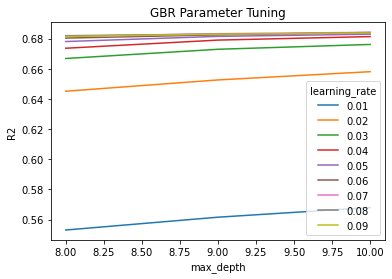

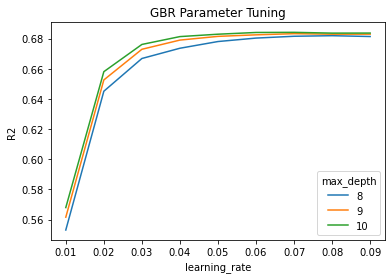

In [104]:
mean_test_score = [0.55306966, 0.56157237, 0.56795282, 0.64511259, 0.65260273,
        0.65807665, 0.66682425, 0.6729304 , 0.67614038, 0.6736221 ,
        0.67903054, 0.68134769, 0.67807095, 0.68149319, 0.68293196,
        0.68035812, 0.68251492, 0.68407785, 0.68156629, 0.68328097,
        0.68416998, 0.68194178, 0.68293773, 0.68364785, 0.6814    ,
        0.68295745, 0.68368598]

for i in range(0, len(mean_test_score), 3):
    plt.plot([8, 9, 10], [mean_test_score[i], mean_test_score[i+1], mean_test_score[i+2]])

plt.title('GBR Parameter Tuning')
plt.xlabel('max_depth')
plt.ylabel('R2')
plt.legend([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09], title='learning_rate')
plt.show()

for i in range(0,3):
    plt.plot([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09],
             [mean_test_score[i], mean_test_score[i + 3], mean_test_score[i + 6], mean_test_score[i + 9], mean_test_score[i + 12], mean_test_score[i + 15], mean_test_score[i + 18], mean_test_score[i + 21], mean_test_score[i + 24]])

plt.title('GBR Parameter Tuning')
plt.xlabel('learning_rate')
plt.ylabel('R2')
plt.legend([8, 9, 10], title='max_depth')
plt.show()

<bound method DataFrame.info of         acousticness  danceability  duration_ms  energy  explicit  \
120218      0.000776         0.485       198680   0.898         0   
89340       0.001830         0.861       229107   0.597         0   
135151      0.489000         0.543       230267   0.390         0   
131408      0.426000         0.628       310400   0.506         0   
103736      0.133000         0.764       680920   0.720         1   
...              ...           ...          ...     ...       ...   
79646       0.483000         0.652       187613   0.529         0   
59089       0.106000         0.328       460067   0.812         0   
45438       0.746000         0.263       397665   0.567         0   
91114       0.800000         0.713       207627   0.429         0   
52646       0.010200         0.607       111733   0.670         0   

        instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
120218           0.00244    4     0.642    -3.750     1   

Text(0.5, 1.0, 'Feature Importance')

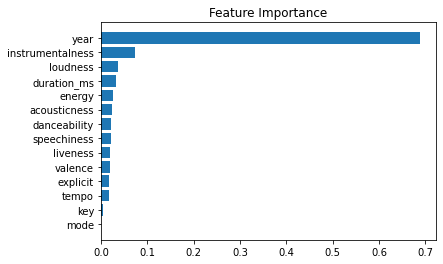

In [114]:
print(X_train.info)
feature_importance = rank_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure()
plt.barh(pos, feature_importance[sorted_idx])
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title('Feature Importance')

In [11]:
model6 = GradientBoostingRegressor(learning_rate=0.05, max_depth=9)
for k in [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:
    w = []
    for _, val in y_train.iteritems():
        if val == 0:
            w.append(k)
        else:
            w.append(1)
    model6.fit(X_train, y_train, w)
    pred = model6.predict(X_test)
    print('score on test data: ' + str(r2_score(y_test, pred)))
    print('')

score on test data: 0.2849003622197911

score on test data: 0.29747760790436306

score on test data: 0.30453946901644013

score on test data: 0.3135929228210106

score on test data: 0.32033326121068406

score on test data: 0.3245178923140434

score on test data: 0.3290771116507739

score on test data: 0.3330043280366619

score on test data: 0.33122256794285054

score on test data: 0.3319835786212154



In [12]:
model7 = GradientBoostingRegressor(learning_rate=0.05, max_depth=9)
model7.fit(X_train, y_train)
pred = model7.predict(X_test)
rank_pred = stats.rankdata(pred, method='min')
rank_true = stats.rankdata(y_test, method='min')
true = 0
total = 0
for i in range(len(rank_pred)):
    for j in range(i+1, len(rank_pred)):
        if rank_pred[i] <= rank_pred[j] and rank_true[i] <= rank_true[j]:
            true += 1
            total += 1
        elif rank_pred[i] > rank_pred[j] and rank_true[i] > rank_true[j]:
            true += 1
            total += 1
        else:
            total += 1
prec = true / total
print("pairwise ranking accuracy: " + str(prec))

pairwise ranking accuracy: 0.6944411668236289
